In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [14]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_train.csv'
x_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_test.csv'
x_test = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_train.csv'
y_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_test.csv'
y_test = pd.read_csv(url)


In [15]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [16]:
knr.score(x_test, y_test)

0.18038800492279672

KNN Grid Search

In [26]:
nums = np.arange(1,20).tolist()
scores = []
for i in range(len(nums)):
  knr = KNeighborsRegressor(n_neighbors=i+1, n_jobs=6)
  knr.fit(x_train, y_train)
  scores.append(knr.score(x_test, y_test))
  print(i+1, ': ' , scores[i])


1 :  -0.16900122451389543
2 :  0.18038800492279672
3 :  0.2630879362261167
4 :  0.3023392170509589
5 :  0.32544860658470787
6 :  0.3394832375037087
7 :  0.3478266117568871
8 :  0.351077871620028
9 :  0.3529868295730402
10 :  0.35589831846854647
11 :  0.3579177622381504
12 :  0.3599640033968162
13 :  0.3610401297147324
14 :  0.3617478920259869
15 :  0.36216097960978066
16 :  0.3615064347828243
17 :  0.3603951125139524
18 :  0.3591169453289954
19 :  0.35802380657637767


Text(0, 0.5, 'Model Score')

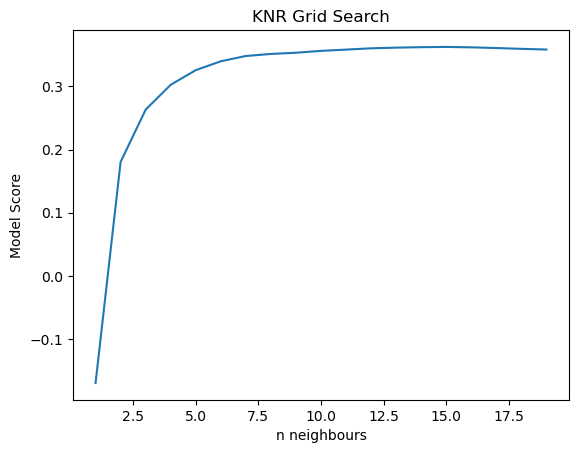

In [27]:
plt.plot(nums, scores)
plt.title('KNR Grid Search')
plt.xlabel('n neighbours')
plt.ylabel('Model Score')

In [28]:
np.argmax(scores)

14

In [29]:
scores[np.argmax(scores)]

0.36216097960978066

In [30]:
knr = KNeighborsRegressor(n_neighbors=np.argmax(scores))
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=14)

In [32]:
y_pred = knr.predict(x_test)

mean_squared_error(y_test, y_pred)

63.0041401260365

Without CPI and Unemployement features as there were NA values in the final submission test set but none in the training and test set of the mode

In [33]:
new_x_train = x_train.drop(columns=['CPI', 'Unemployment'])
new_x_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,MDAverage,MDSum,MDMin,MDMax
0,1.392183,1.270486,-1.288570,-0.275106,-0.036322,-1.158147,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.885307,0.300999,-0.271794,-1.358972,-0.427943,-0.084662
1,-1.188910,-0.926810,-1.361242,-0.275106,-0.731251,-1.275919,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,-1.082558,-0.271794,-1.358972,-0.427943,-0.084662
2,-1.188910,0.352213,1.400316,-0.275106,0.244469,0.455762,-0.252011,-0.037627,-0.084038,0.046557,0.081929,0.615438,-1.082558,-0.049038,-0.245190,-0.252011,0.081929
3,0.140744,-1.221970,-0.125808,-0.275106,-0.086734,1.853757,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.885307,1.100205,-0.271794,-1.358972,-0.427943,-0.084662
4,0.062529,-1.156379,-1.724605,-0.275106,-2.430631,-1.249747,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,-0.363967,-0.271794,-1.358972,-0.427943,-0.084662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330172,0.375389,-0.369287,1.424540,-0.275106,0.820144,0.998821,6.068185,-0.134782,-0.073029,6.259835,0.356177,-0.885307,1.106191,2.495277,12.476386,-0.134782,6.259835
330173,1.392183,-0.598856,-0.610292,-0.275106,-1.946565,-0.460240,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.885307,0.300999,-0.271794,-1.358972,-0.427943,-0.084662
330174,-0.641405,0.516190,1.109625,-0.275106,-0.264532,1.286708,3.053010,-0.173069,-0.061488,1.131793,0.261853,-0.885307,1.052305,0.842420,4.212100,-0.173069,3.053010
330175,-0.484975,-1.123583,-0.464947,-0.275106,-2.517904,-0.763393,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,-1.304202,-0.271794,-1.358972,-0.427943,-0.084662


In [34]:
new_x_test = x_test.drop(columns=['CPI', 'Unemployment'])
new_x_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,MDAverage,MDSum,MDMin,MDMax
0,-0.093901,1.762418,0.431348,-0.275106,0.274825,-0.017506,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,0.056396,-0.271794,-1.358972,-0.427943,-0.084662
1,-0.328545,-1.254765,-1.724605,-0.275106,-2.101054,-1.249747,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,-0.263607,-0.271794,-1.358972,-0.427943,-0.084662
2,-1.032480,0.745759,-0.973655,3.634961,0.954577,-1.736101,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,-0.178662,-0.271794,-1.358972,-0.427943,-0.084662
3,-0.328545,-1.385947,1.133850,-0.275106,-0.143651,1.277984,1.481708,-0.173069,-0.068486,0.125175,0.534460,0.615438,-0.263607,0.379958,1.899788,-0.173069,1.481708
4,0.531819,0.385008,-0.997879,-0.275106,0.854294,-1.365338,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,-0.706618,-0.271794,-1.358972,-0.427943,-0.084662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82540,-1.188910,-0.631651,-1.579260,-0.275106,-1.683121,-1.459119,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,-1.082558,-0.271794,-1.358972,-0.427943,-0.084662
82541,0.688249,-0.795628,0.891608,-0.275106,-0.042826,0.586620,3.080816,0.031387,-0.079891,2.718102,1.493845,-0.885307,1.099074,1.448852,7.244258,-0.079891,3.080816
82542,-0.406760,0.385008,0.431348,-0.275106,-0.694933,0.475391,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.615438,-0.713997,-0.271794,-1.358972,-0.427943,-0.084662
82543,0.922894,-0.434878,-1.458139,-0.275106,-0.273747,-1.212671,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.885307,0.350704,-0.271794,-1.358972,-0.427943,-0.084662


Predict the test set

In [ ]:
#provided submission test dataset
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

#test dataset after preprocessing
#url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/Submission%20Test.csv'
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/Submission%20Test.csv'
submission_test = pd.read_csv(url)

Final Submission Format:

Id,Weekly_Sales

1_1_2012-11-02,0

1_1_2012-11-09,0

1_1_2012-11-16,0

In [ ]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
Id

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Length: 115064, dtype: string

In [ ]:
submission_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MDAverage,MDSum,MDMin,MDMax
0,-1.657956,-1.413724,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
1,-1.657956,-1.381105,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
2,-1.657956,-1.348485,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
3,-1.657956,-1.315865,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
4,-1.657956,-1.283245,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.587292,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,-0.329306,-1.646529,-0.698176,-0.105842
115060,1.776894,1.619912,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,-0.329306,-1.646529,-0.698176,-0.105842
115061,1.776894,1.652532,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,-0.329306,-1.646529,-0.698176,-0.105842
115062,1.776894,1.717771,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,-0.329306,-1.646529,-0.698176,-0.105842


In [ ]:
y_pred = knr.predict(submission_test)
y_pred

array([[31.32840941],
       [31.13798587],
       [30.44504482],
       ...,
       [27.61980652],
       [23.57741721],
       [23.57741721]])

We previously scaled down the weekly sales by cube rooting the values and since these are dollar values, the final number is rounded to the nearest 2 decimals 

In [ ]:
weekly_sales = np.round(y_pred[:,0]**3, 2)
weekly_sales

array([30747.87, 30190.59, 28219.54, ..., 21069.87, 13106.56, 13106.56])

In [ ]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
knr_submission = pd.DataFrame(data=sub)
knr_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,30747.87
1,1_1_2012-11-09,30190.59
2,1_1_2012-11-16,28219.54
3,1_1_2012-11-23,32096.82
4,1_1_2012-11-30,28760.25
...,...,...
115059,45_98_2013-06-28,23415.26
115060,45_98_2013-07-05,23109.09
115061,45_98_2013-07-12,21069.87
115062,45_98_2013-07-19,13106.56


In [ ]:
knr_submission.to_csv('Submission Files/KNR 1.csv', float_format='%.2f',index=False)